In [8]:
import cv2 as cv
from matplotlib import pyplot as plt
import json
import numpy as np
import os

In [9]:
config = json.load(open("../config.json"))
print(config)
antrenare_folder = "../../antrenare/"
evaluare_folder = "../../evaluare/"
auxiliare_folder = "../../imagini_auxiliare/"

{'base_image_path': '../imagini_auxiliare/01.jpg', 'score_tracker': [-1, 1, 2, 3, 4, 5, 6, 0, 2, 5, 3, 4, 6, 2, 2, 0, 3, 5, 4, 1, 6, 2, 4, 5, 5, 0, 6, 3, 4, 2, 0, 1, 5, 1, 3, 4, 4, 4, 5, 0, 6, 3, 5, 4, 1, 3, 2, 0, 0, 1, 1, 2, 3, 6, 3, 5, 2, 1, 0, 6, 6, 5, 2, 1, 2, 5, 0, 3, 3, 5, 0, 6, 1, 4, 0, 6, 3, 5, 1, 4, 2, 6, 2, 3, 1, 6, 5, 6, 2, 0, 4, 0, 1, 6, 4, 4, 1, 6, 6, 3, 100], 'board': [[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0

In [10]:
def show_image(image):
    image = cv.resize(image, (0, 0), fx=0.3, fy=0.3)
    cv.imshow("image", image)
    cv.waitKey(0)
    cv.destroyAllWindows()


def print_image(image, gray=True, fft=True, title=None, output_dir=None):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    if not gray:
        image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        axes[0].imshow(image_rgb)
        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        axes[0].imshow(image, cmap="gray")
        image_gray = image
    axes[0].set_title("Image")
    axes[0].axis("off")

    if fft:
        f = np.fft.fft2(image_gray)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-60)
        axes[1].imshow(magnitude_spectrum, cmap="gray")
        axes[1].set_title("Spectrum")
        axes[1].axis("off")
    else:
        axes[1].remove()

    if title:
        plt.suptitle(title)
    plt.tight_layout()

    if output_dir:
        plt.savefig(output_dir)
    else:
        plt.show()


def color_filter(image, color_rgb, sensitivity):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    color_hsv = cv.cvtColor(color_rgb, cv.COLOR_RGB2HSV)
    h, s, v = color_hsv[0][0]
    lower_bound = np.array(
        [h - sensitivity, max(s - sensitivity, 0), max(v - sensitivity, 0)]
    )
    upper_bound = np.array(
        [h + sensitivity, min(s + sensitivity, 255), min(v + sensitivity, 255)]
    )

    mask = cv.inRange(hsv, lower_bound, upper_bound)
    filtered_image = cv.bitwise_and(image, image, mask=mask)
    return filtered_image


def find_largest_contour(mask):
    mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)
    _, binary = cv.threshold(mask, 1, 255, cv.THRESH_BINARY)
    binary = cv.morphologyEx(
        binary, cv.MORPH_CLOSE, np.ones((5, 5), np.uint8), iterations=20
    )
    contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    if contours:
        return max(contours, key=cv.contourArea)
    return None


base_img = cv.imread("./fake_test/1_11.jpg")
first_img = cv.imread("./fake_test/1_12.jpg")

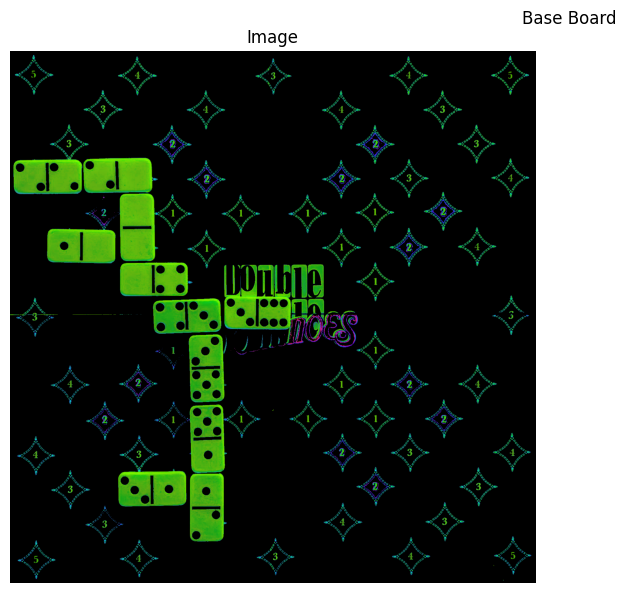

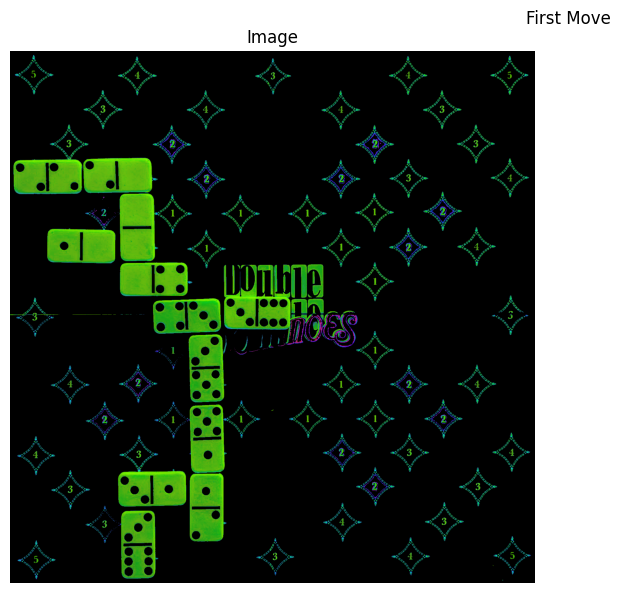

In [11]:
import sys

sys.path.insert(0, "../")
from util import crop_board, denoise, sharpen, edge_detect, color_filter

first_move_cropped = crop_board(first_img)


def pipeline(image):
    image = crop_board(image)
    image = color_filter(image, np.uint8([[[200, 240, 250]]]), 60)
    image = cv.cvtColor(image, cv.COLOR_HSV2BGR)
    # image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    # image = denoise(image)
    # image = sharpen(image)
    # image = edge_detect(image)
    return image


base_board = pipeline(base_img.copy())
first_move = pipeline(first_img.copy())
print_image(base_board, title="Base Board", fft=False)
print_image(first_move, title="First Move", fft=False)

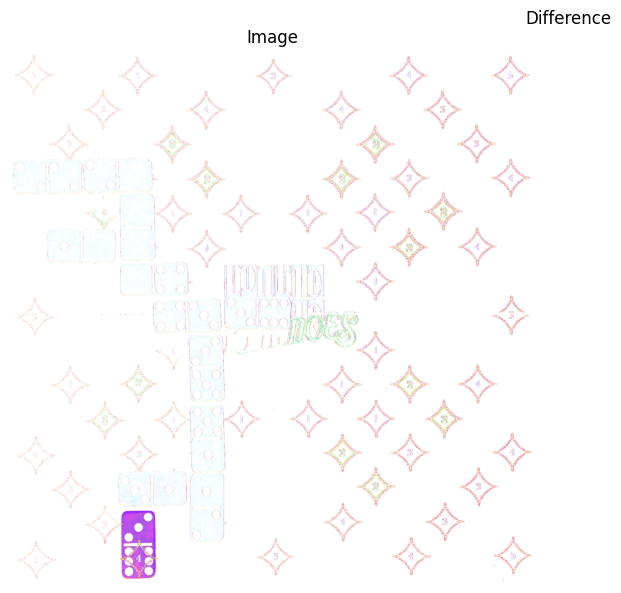

In [12]:
# Resize images to the same size
size = (
    max(base_board.shape[1], first_move.shape[1]),
    max(base_board.shape[0], first_move.shape[0]),
)
base_board_diff = cv.resize(base_board, size, interpolation=cv.INTER_AREA)
first_move_diff = cv.resize(first_move, size, interpolation=cv.INTER_AREA)

difference = 255 - cv.absdiff(first_move_diff, base_board_diff)

print_image(difference, title="Difference", fft=False)

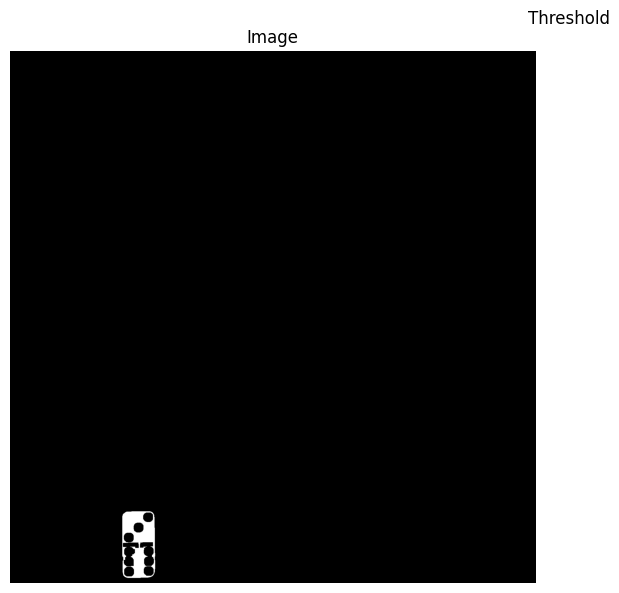

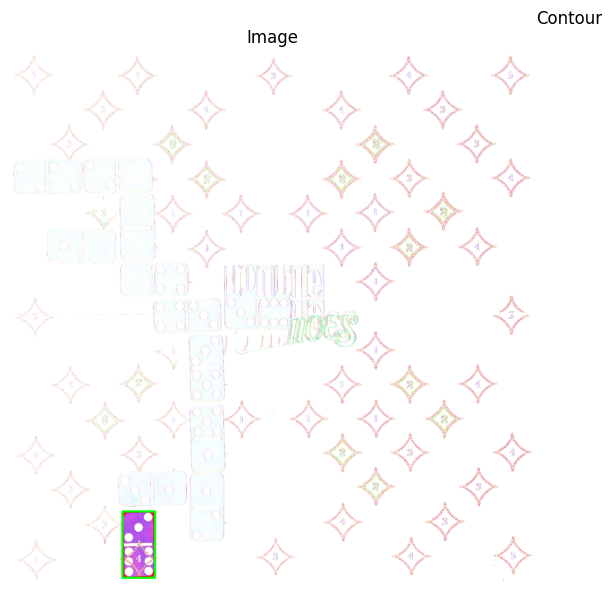

In [13]:
# identify rectangle domino piece 2x1
image = difference.copy()
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, thresh = cv.threshold(gray, 160, 255, cv.THRESH_BINARY_INV)
thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations=1)
thresh = cv.morphologyEx(
    thresh, cv.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=3
)
thresh = cv.erode(thresh, np.ones((3, 3), np.uint8), iterations=2)
# thresh = cv.morphologyEx(thresh, cv.MORPH_GRADIENT, np.ones((3, 3), np.uint8))

print_image(thresh, title="Threshold", fft=False)

cnts, hierarchy = cv.findContours(
    thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
)

good_contours = []
for contour in cnts:
    area = cv.contourArea(contour)
    if area > 15:
        x, y, w, h = cv.boundingRect(contour)
        aspect_ratio = max(w / h, h / w)
        if 1.9 < aspect_ratio < 2.1:
            # print(f"Area: {area}, Aspect Ratio: {aspect_ratio}")
            good_contours.append(contour)

contour = max(cnts, key=cv.contourArea)

contour_poly = cv.approxPolyDP(contour, 3, True)
bounding_rect = cv.boundingRect(contour_poly)

output = image.copy()
output = cv.drawContours(image, [contour_poly], -1, (255, 0, 0), 6)
output = cv.rectangle(output, bounding_rect, (0, 255, 0), 6)

print_image(output, title="Contour", fft=False)

3 5


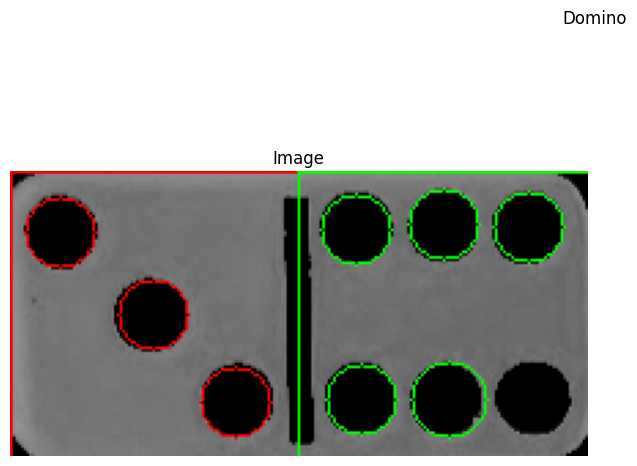

In [14]:
x, y, w, h = bounding_rect
domino = first_move_diff.copy()[y : y + h, x : x + w]
domino = cv.cvtColor(domino, cv.COLOR_BGR2GRAY)
# domino = cv.GaussianBlur(domino, (5, 5), 0)


if h > w:
    domino = cv.rotate(domino, cv.ROTATE_90_COUNTERCLOCKWISE)
    w, h = h, w


left_rect_start = (0, 0)
left_rect_end = (w // 2, h)

right_rect_start = (w // 2, 0)
right_rect_end = (w, h)

left_square = domino[
    left_rect_start[1] : left_rect_end[1], left_rect_start[0] : left_rect_end[0]
]
right_square = domino[
    right_rect_start[1] : right_rect_end[1], right_rect_start[0] : right_rect_end[0]
]


def circles(image):
    circles = cv.HoughCircles(
        image,
        cv.HOUGH_GRADIENT_ALT,
        dp=1,
        minDist=30,
        param1=300,
        param2=0.2,
        minRadius=12,
        maxRadius=16,
    )
    circles = np.uint16(np.around(circles))
    return circles


left_circles = circles(left_square)
right_circles = circles(right_square)

domino = cv.cvtColor(domino, cv.COLOR_GRAY2RGB)

for circle in left_circles[0, :]:
    x, y, r = circle
    cv.circle(domino, (x, y), r, (0, 0, 255), 1)

for circle in right_circles[0, :]:
    x, y, r = circle
    cv.circle(domino, (x + w // 2, y), r, (0, 255, 0), 1)

left_circles = len(left_circles[0, :])
right_circles = len(right_circles[0, :])
print(left_circles, right_circles)

cv.rectangle(domino, left_rect_start, left_rect_end, (0, 0, 255), 1)
cv.rectangle(domino, right_rect_start, right_rect_end, (0, 255, 0), 1)
print_image(domino, title="Domino", fft=False, gray=False)